In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
def_df = pd.read_csv('defunciones_corte18abril.csv', parse_dates=['fec_defuncion'], low_memory=False)
def_df.rename(columns={'fec_defuncion':'Date'},inplace=True)
def_df.head()

,edad,sexo,Date,estado,causa,causa_registro,alcaldia,LugarMuerte,num_consecutivo
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523


In [50]:
def_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420527 entries, 0 to 420526
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   edad             420362 non-null  float64       
 1   sexo             420527 non-null  object        
 2   Date             420527 non-null  datetime64[ns]
 3   estado           414125 non-null  object        
 4   causa            420527 non-null  object        
 5   causa_registro   190998 non-null  object        
 6   alcaldia         277049 non-null  object        
 7   LugarMuerte      168882 non-null  object        
 8   num_consecutivo  420527 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 28.9+ MB


In [51]:
gender_grouped = def_df.groupby('sexo')
gender_df =  pd.DataFrame(gender_grouped['Date'].count())
gender_df.rename(columns={'Date':'count'},inplace=True)
gender_df['Percentage'] = gender_df['count']/gender_df['count'].sum()
gender_df.head()

,count,Percentage
sexo,,
Hombre,231548,0.550614
Indefinido,128,0.000304
Mujer,188851,0.449082


In [52]:
def_df['Month'] = def_df['Date'].dt.month
def_df['Weekday'] = def_df['Date'].dt.weekday
def_df['Day'] = def_df['Date'].dt.dayofyear
def_df['Year'] = def_df['Date'].dt.year
def_df.head()

,edad,sexo,Date,estado,causa,causa_registro,alcaldia,LugarMuerte,num_consecutivo,Month,Weekday,Day,Year
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527,4,5,100,2021
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526,4,5,100,2021
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525,4,5,100,2021
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524,4,5,100,2021
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523,4,5,100,2021


In [53]:
month_grouped = def_df.groupby(['Year','Day']).count().reset_index().set_index('Year')

for index in month_grouped.index.unique():
    temp = month_grouped[['Date','Day']].loc[index]
    plt.plot(temp['Day'],temp['Date'],label = index)
plt.legend()
#plt.savefig('Images/dethsByYear.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


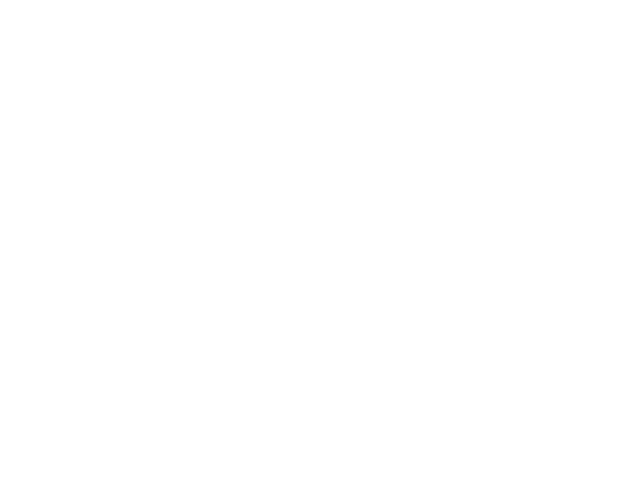

In [54]:
%matplotlib notebook
def_df.head()


DeathsGender_df = def_df.copy()

#Deaths Gender
DeathsGender_Total = pd.DataFrame(DeathsGender_df, columns=["sexo","edad", "Year", "Date"])
DeathsGender_Total_1_bar = DeathsGender_Total.groupby(["Date"])
Analysis_DeathsGender_Total_1_bar = DeathsGender_Total_1_bar
Analysis_DeathsGender_Total_1_bar.head()
Analysis_DeathsGender_Total_2_bar = round(Analysis_DeathsGender_Total_1_bar[["edad"]].count(),2)
Analysis_DeathsGender_Total_2_bar.head()

y_values_DeathGender =  Analysis_DeathsGender_Total_2_bar["edad"].to_numpy()
y_values_DeathGender

Analysis_DeathsGender_Total_2_bar.reset_index(inplace=True)
Analysis_DeathsGender_Total_2_bar
Analysis_DeathsGender_Total_2_bar['edad'] = Analysis_DeathsGender_Total_2_bar['edad'].astype(str)
Analysis_DeathsGender_Total_3_bar = Analysis_DeathsGender_Total_2_bar['edad'].to_numpy()
x_labels_stackbar = Analysis_DeathsGender_Total_3_bar
                                        
                                        
#Chart 

labels = x_labels_stackbar
men_means = y_values_DeathGender

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Deaths')

ax.set_ylabel('Deaths')
ax.set_title('Deaths from 2017 to YTD2021')
ax.legend()
ax.set_xlabel('Dates from  2017 to YTD2021')
plt.show()








<IPython.core.display.Javascript object>


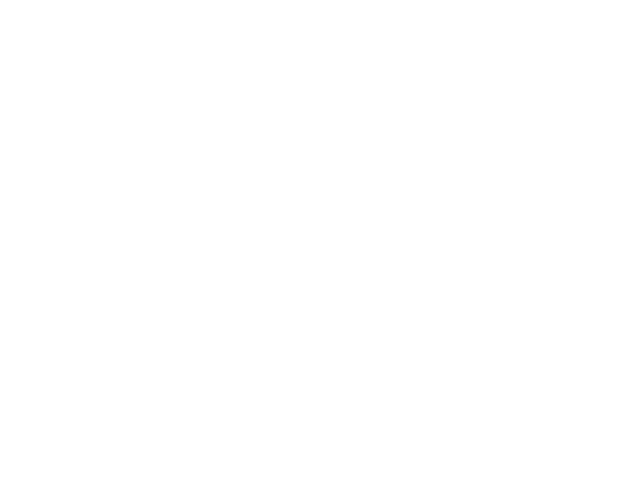

In [55]:
%matplotlib notebook
def_df.head()


DeathsGender_df = def_df.copy()

#Hombre Values
DeathsGender_Hombre = DeathsGender_df[DeathsGender_df['sexo'] == "Hombre"]
DeathsGender_Hombre_1 = pd.DataFrame(DeathsGender_Hombre, columns=["sexo","edad", "Year"])
DeathsGender_Hombre_1_bar = DeathsGender_Hombre_1.groupby(["Year"])
Analysis_DeathsGender_Hombre_1_bar = DeathsGender_Hombre_1_bar
Analysis_DeathsGender_Hombre_1_bar.head()
Analysis_DeathsGender_Hombre_2_bar = round(Analysis_DeathsGender_Hombre_1_bar[["edad"]].count(),2)

x_labels_stackbar = Analysis_DeathsGender_Hombre_2_bar.index.values.tolist()
y_values_hombres =  Analysis_DeathsGender_Hombre_2_bar["edad"].to_numpy()
y_values_hombres

#Mujer Values
DeathsGender_Mujer = DeathsGender_df[DeathsGender_df['sexo'] == "Mujer"]
DeathsGender_Mujer_1 = pd.DataFrame(DeathsGender_Mujer, columns=["sexo","edad", "Year"])
DeathsGender_Mujer_1_bar = DeathsGender_Mujer_1.groupby(["Year"])
Analysis_DeathsGender_Mujer_1_bar = DeathsGender_Mujer_1_bar
Analysis_DeathsGender_Mujer_1_bar.head()
Analysis_DeathsGender_Mujer_2_bar = round(Analysis_DeathsGender_Mujer_1_bar[["edad"]].count(),2)

y_values_mujer =  Analysis_DeathsGender_Mujer_2_bar["edad"].to_numpy()
y_values_mujer

#Indefinido Values
DeathsGender_Indefinido = DeathsGender_df[DeathsGender_df['sexo'] == "Indefinido"]
DeathsGender_Indefinido_1 = pd.DataFrame(DeathsGender_Indefinido, columns=["sexo","edad", "Year"])
DeathsGender_Indefinido_1_bar = DeathsGender_Indefinido_1.groupby(["Year"])
Analysis_DeathsGender_Indefinido_1_bar = DeathsGender_Indefinido_1_bar
Analysis_DeathsGender_Indefinido_1_bar.head()
Analysis_DeathsGender_Indefinido_2_bar = round(Analysis_DeathsGender_Indefinido_1_bar[["edad"]].count(),2)

y_values_indefinido =  Analysis_DeathsGender_Indefinido_2_bar["edad"].to_numpy()
y_values_indefinido

#####Chart 

labels = x_labels_stackbar
men_means = y_values_hombres
women_means = y_values_mujer
unknown_means = y_values_indefinido

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Hombre')
ax.bar(labels, women_means, width, bottom = men_means, label='Mujer')
ax.bar(labels, unknown_means, width, bottom= men_means + women_means, label='Indefinido')

ax.set_ylabel('Deaths')
ax.set_title('Deaths by year and gender')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


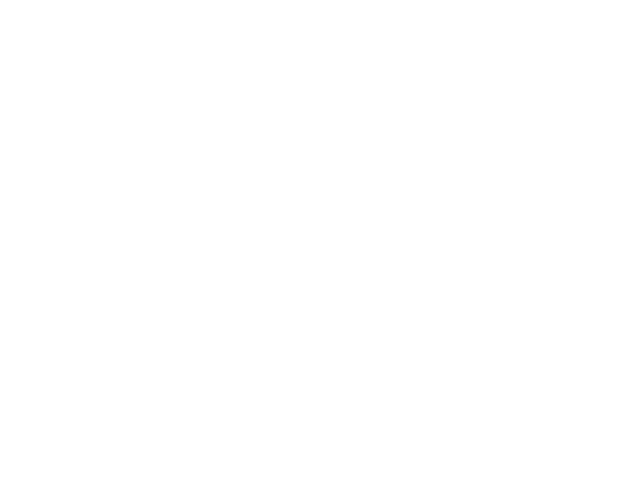

In [56]:
%matplotlib notebook
def_df.head()


DeathsAge_df = def_df.copy()

#Hombre Values
DeathsAge_Total = pd.DataFrame(DeathsAge_df, columns=["sexo","edad", "Year", "Date"])
#DeathsGender_Hombre = DeathsAge_df[DeathsAge_df['Year'] == "2020"]

DeathsAge_Total_1_bar = DeathsAge_Total.groupby(["edad"])
Analysis_DeathsAge_Total_1_bar = DeathsAge_Total_1_bar
Analysis_DeathsAge_Total_1_bar.head()
Analysis_DeathsAge_Total_2_bar = round(Analysis_DeathsAge_Total_1_bar[["sexo"]].count(),2)
Analysis_DeathsAge_Total_2_bar.head()


y_values_Age =  Analysis_DeathsAge_Total_2_bar["sexo"].to_numpy()
y_values_Age
Analysis_DeathsAge_Total_2_bar.reset_index(inplace=True)
Analysis_DeathsAge_Total_2_bar
Analysis_DeathsAge_Total_2_bar['edad'] = Analysis_DeathsAge_Total_2_bar['edad'].astype(str)
Analysis_DeathsAge_Total_3_bar = Analysis_DeathsAge_Total_2_bar['edad'].to_numpy()
x_labels_stackbar_age = Analysis_DeathsAge_Total_3_bar
                                        
                                        
#####Chart 

labels = x_labels_stackbar_age
age_means = y_values_Age

fig, ax = plt.subplots()

ax.bar(labels, age_means, label='Deaths')

ax.set_ylabel('Deaths')
ax.set_title('Deaths from 2017 to YTD2021')
ax.set_xlabel('Age')
ax.legend()

plt.show()


<IPython.core.display.Javascript object>


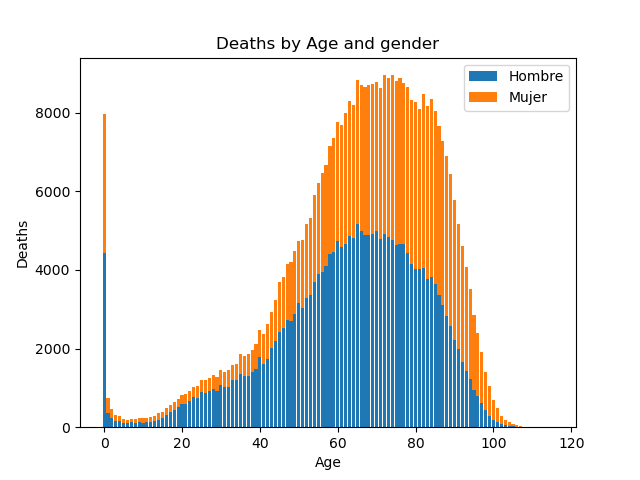

In [57]:
%matplotlib notebook
def_df.head()


DeathsAgeGender_df = def_df.copy()

#Hombre Values
DeathsAgeGender_Hombre = DeathsAgeGender_df[DeathsAgeGender_df['sexo'] == "Hombre"]
DeathsAgeGender_Hombre_1 = pd.DataFrame(DeathsAgeGender_Hombre, columns=["sexo","edad", "Year"])
DeathsAgeGender_Hombre_1_bar = DeathsAgeGender_Hombre_1.groupby(["edad"])
Analysis_DeathsAgeGender_Hombre_1_bar = DeathsAgeGender_Hombre_1_bar
Analysis_DeathsAgeGender_Hombre_1_bar.head()
Analysis_DeathsAgeGender_Hombre_2_bar = round(Analysis_DeathsAgeGender_Hombre_1_bar[["Year"]].count(),2)

x_labels_stackbar_ag = Analysis_DeathsAgeGender_Hombre_2_bar.index.values.tolist()
y_values_hombres_ag =  Analysis_DeathsAgeGender_Hombre_2_bar["Year"].to_numpy()
y_values_hombres_ag

#Mujer Values
DeathsAgeGender_Mujer = DeathsAgeGender_df[DeathsAgeGender_df['sexo'] == "Mujer"]
DeathsAgeGender_Mujer_1 = pd.DataFrame(DeathsAgeGender_Mujer, columns=["sexo","edad", "Year"])
DeathsAgeGender_Mujer_1_bar = DeathsAgeGender_Mujer_1.groupby(["edad"])
Analysis_DeathsAgeGender_Mujer_1_bar = DeathsAgeGender_Mujer_1_bar
Analysis_DeathsAgeGender_Mujer_1_bar.head()
Analysis_DeathsAgeGender_Mujer_2_bar = round(Analysis_DeathsAgeGender_Mujer_1_bar[["Year"]].count(),2)

y_values_mujer_ag =  Analysis_DeathsAgeGender_Mujer_2_bar["Year"].to_numpy()
y_values_mujer_ag


#####Chart 

labels = x_labels_stackbar_ag
men_means = y_values_hombres_ag
women_means = y_values_mujer_ag

fig, ax = plt.subplots()

ax.bar(labels, men_means, label='Hombre')
ax.bar(labels, women_means, bottom = men_means, label='Mujer')


ax.set_ylabel('Deaths')
ax.set_xlabel('Age')
ax.set_title('Deaths by Age and gender')
ax.legend()

plt.show()